___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Logistic Regression Project 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [2]:
data = 'data/advertising.csv'
df = pd.read_csv(data)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

**Check the head of ad_data**

In [3]:
df.head()

daily_time_spent_on_site  age  area_income  daily_internet_usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           ad_topic_line            city  male     country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             timestamp  clicked_on_ad  
0  2016-03-27 00:53:11              0  
1  2016-04-04 01:39:02              0  
2  2016-03-13 20:35:42              0  
3  2016-01-10 02:31:19              0  
4  2016-06-03 03:36:18              0

** Use info and describe() on ad_data**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
daily_time_spent_on_site    1000 non-null float64
age                         1000 non-null int64
area_income                 1000 non-null float64
daily_internet_usage        1000 non-null float64
ad_topic_line               1000 non-null object
city                        1000 non-null object
male                        1000 non-null int64
country                     1000 non-null object
timestamp                   1000 non-null object
clicked_on_ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
df.describe()

daily_time_spent_on_site          age   area_income  \
count               1000.000000  1000.000000   1000.000000   
mean                  65.000200    36.009000  55000.000080   
std                   15.853615     8.785562  13414.634022   
min                   32.600000    19.000000  13996.500000   
25%                   51.360000    29.000000  47031.802500   
50%                   68.215000    35.000000  57012.300000   
75%                   78.547500    42.000000  65470.635000   
max                   91.430000    61.000000  79484.800000   

       daily_internet_usage         male  clicked_on_ad  
count           1000.000000  1000.000000     1000.00000  
mean             180.000100     0.481000        0.50000  
std               43.902339     0.499889        0.50025  
min              104.780000     0.000000        0.00000  
25%              138.830000     0.000000        0.00000  
50%              183.130000     0.000000        0.50000  
75%              218.792500     1.000000        1.00000  
max              269.960000     1.000000        1.00000

## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

/home/salas/miniconda3/envs/supervised/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


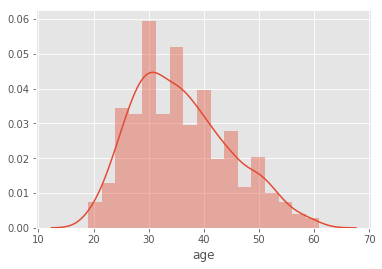

In [6]:
#df.age.plot('hist')
sns.distplot(df.age)

**Create a jointplot showing Area Income versus Age.**

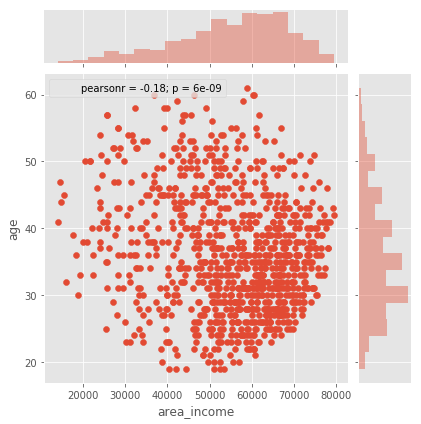

In [7]:
sns.jointplot('area_income','age',data=df)

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

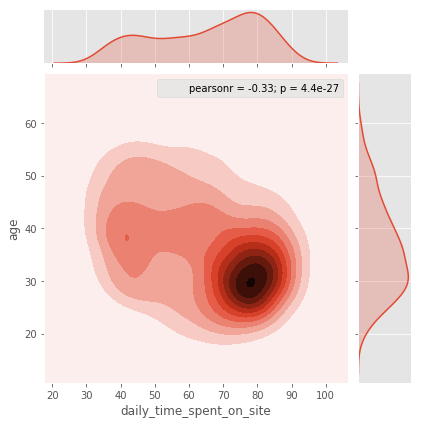

In [30]:
sns.jointplot('daily_time_spent_on_site','age',data=df,kind='kde')

** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

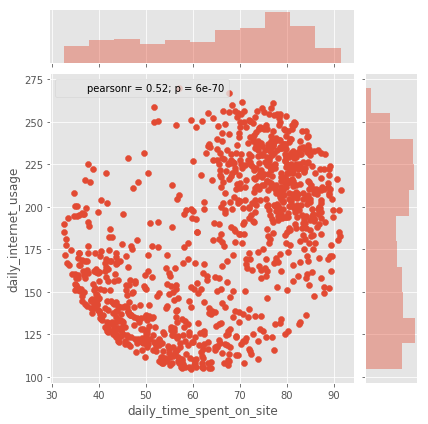

In [10]:
sns.jointplot('daily_time_spent_on_site','daily_internet_usage',data=df)

## get dummies

In [ ]:
#df.ad_topic_line.value_counts()
#df.city.value_counts()
#df.country.value_counts()

In [11]:
df.head()

daily_time_spent_on_site  age  area_income  daily_internet_usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           ad_topic_line            city  male     country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             timestamp  clicked_on_ad  
0  2016-03-27 00:53:11              0  
1  2016-04-04 01:39:02              0  
2  2016-03-13 20:35:42              0  
3  2016-01-10 02:31:19              0  
4  2016-06-03 03:36:18              0

In [12]:
# get city
city = pd.get_dummies(df.city,drop_first=True)
# get country
country = pd.get_dummies(df.country,drop_first=True)

In [13]:
#df = pd.concat([df,city,country],axis=1)
df.drop(['city','country','ad_topic_line','timestamp'],axis=1,inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
daily_time_spent_on_site    1000 non-null float64
age                         1000 non-null int64
area_income                 1000 non-null float64
daily_internet_usage        1000 non-null float64
male                        1000 non-null int64
clicked_on_ad               1000 non-null int64
dtypes: float64(3), int64(3)
memory usage: 47.0 KB


In [ ]:
# # timestamp
# df.timestamp = pd.to_datetime(df.timestamp)

In [15]:
df.head()

daily_time_spent_on_site  age  area_income  daily_internet_usage  male  \
0                     68.95   35     61833.90                256.09     0   
1                     80.23   31     68441.85                193.77     1   
2                     69.47   26     59785.94                236.50     0   
3                     74.15   29     54806.18                245.89     1   
4                     68.37   35     73889.99                225.58     0   

   clicked_on_ad  
0              0  
1              0  
2              0  
3              0  
4              0

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

In [43]:
y = df.clicked_on_ad.values
X = df.drop('clicked_on_ad',axis=1).values

In [44]:
from sklearn.cross_validation import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

** Train and fit a logistic regression model on the training set.**

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
log_model = LogisticRegression()
log_model.fit(X_train,y_train)
pred = log_model.predict(X_test)

## Predictions and Evaluations
** Now predict values for the testing data.**

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.91      0.95      0.93       157
          1       0.94      0.90      0.92       143

avg / total       0.92      0.92      0.92       300



** Create a classification report for the model.**

In [50]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[149,   8],
       [ 15, 128]])

## With dummies

In [51]:
df = pd.concat([df,city,country],axis=1)
df.head()

daily_time_spent_on_site  age  area_income  daily_internet_usage  male  \
0                     68.95   35     61833.90                256.09     0   
1                     80.23   31     68441.85                193.77     1   
2                     69.47   26     59785.94                236.50     0   
3                     74.15   29     54806.18                245.89     1   
4                     68.37   35     73889.99                225.58     0   

   clicked_on_ad  Adamside  Adamsstad  Alanview  Alexanderfurt    ...     \
0              0         0          0         0              0    ...      
1              0         0          0         0              0    ...      
2              0         0          0         0              0    ...      
3              0         0          0         0              0    ...      
4              0         0          0         0              0    ...      

   Uruguay  Uzbekistan  Vanuatu  Venezuela  Vietnam  Wallis and Futuna  \
0        0           0        0          0        0                  0   
1        0           0        0          0        0                  0   
2        0           0        0          0        0                  0   
3        0           0        0          0        0                  0   
4        0           0        0          0        0                  0   

   Western Sahara  Yemen  Zambia  Zimbabwe  
0               0      0       0         0  
1               0      0       0         0  
2               0      0       0         0  
3               0      0       0         0  
4               0      0       0         0  

[5 rows x 2414 columns]

In [53]:
y = df.clicked_on_ad.values
X = df.drop('clicked_on_ad',axis=1).values

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [55]:
log_model = LogisticRegression()
log_model.fit(X_train,y_train)
pred = log_model.predict(X_test)

In [56]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.91      0.95      0.93       157
          1       0.94      0.90      0.92       143

avg / total       0.92      0.92      0.92       300



In [57]:
confusion_matrix(y_test,pred)

array([[149,   8],
       [ 15, 128]])

## Great Job!